#### (numpy) 2차원 배열 -> 2차원 배열

In [1]:
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])
x.T@y

array([[32]])

In [2]:
np.dot(x.T, y)

array([[32]])

#### (numpy) 1차원 배열 -> 스칼라

In [5]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x@y

32

In [6]:
np.dot(x, y)

32

#### Ex. 2.2.1

In [7]:
p = np.array([100, 80, 50])
n = np.array([3, 4, 5])
amount = p@n
amount

870

In [12]:
x = np.arange(10)
N = len(x)
average = np.ones(N)@x/N
average

4.5

In [13]:
x.mean()

4.5

#### (코사인) 유사도

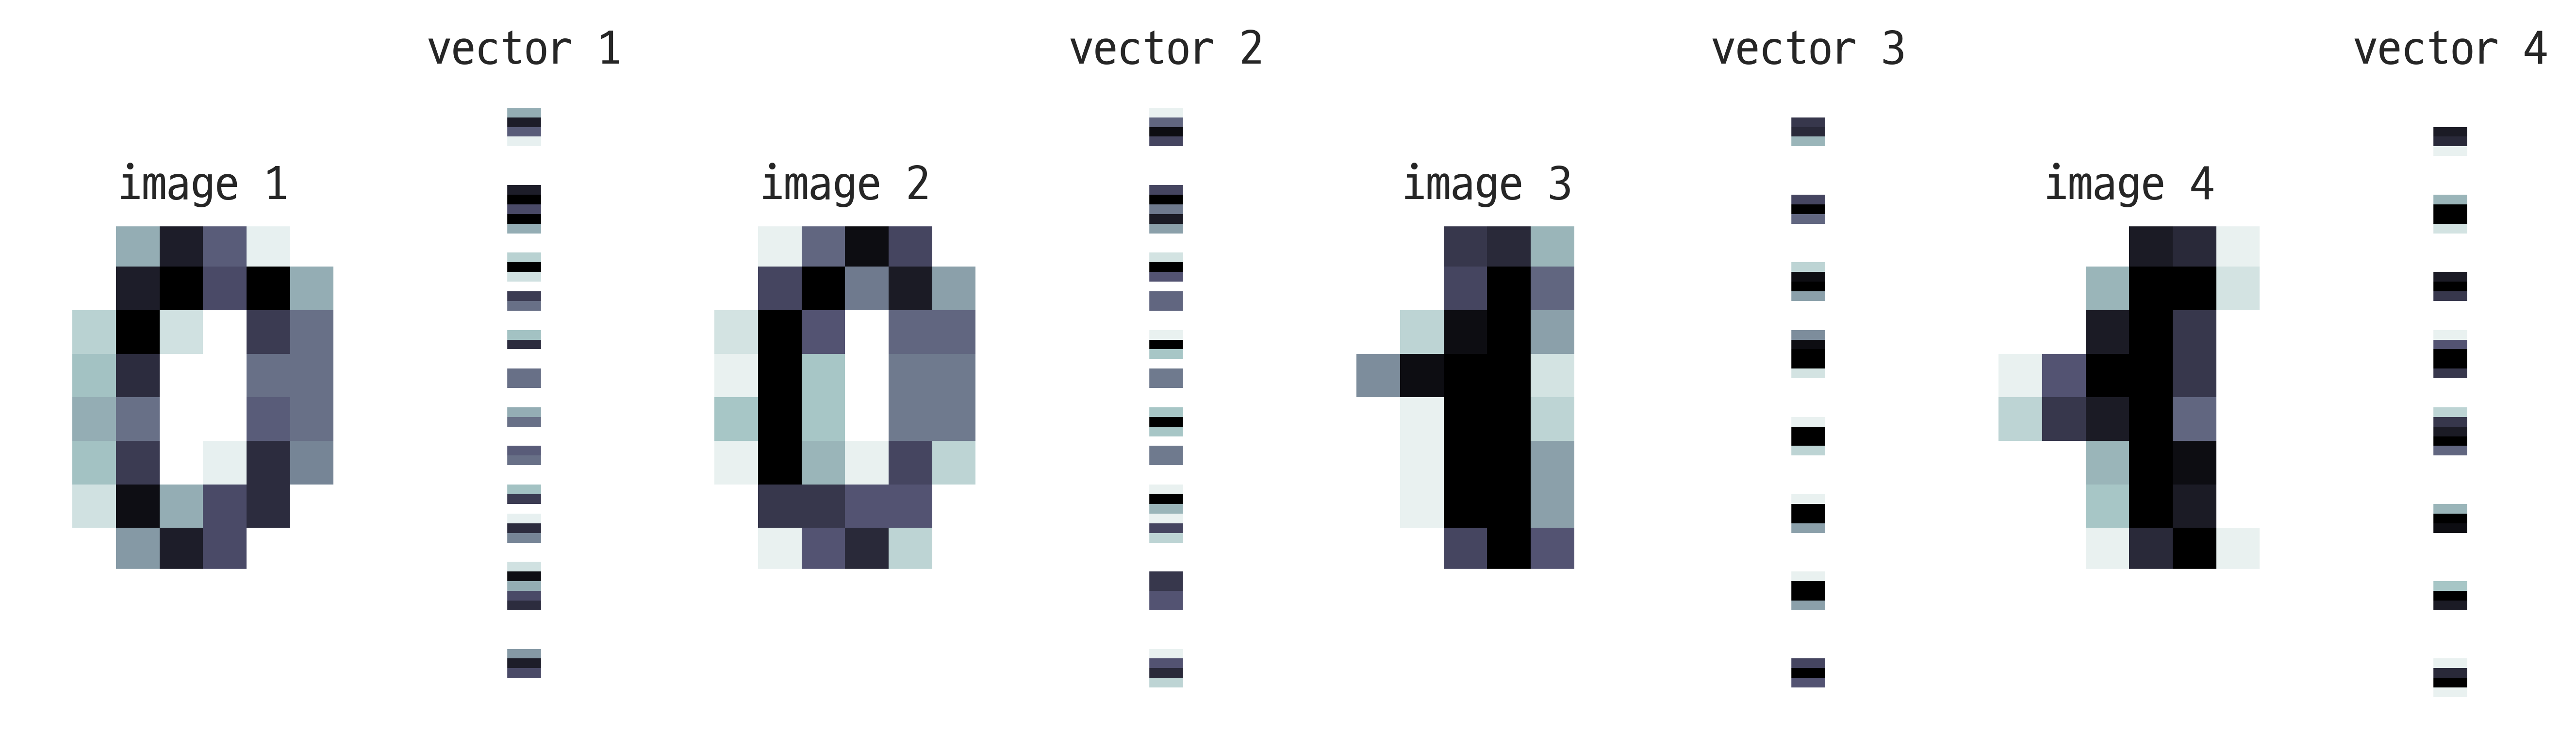

In [16]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1], width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1, interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25, interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [21]:
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [22]:
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

(1866.0, 1883.0, 2421.0, 2479.0)

In [28]:
from sklearn.datasets import load_digits
X = load_digits().data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
X[0].T @ X[9]

2807.0

In [57]:
range(len(X))

range(0, 1797)

In [58]:
# similarity = []

# for i in range(len(X)):
#     m = 0
#     n = i
#     while m < (len(X) - 1):
#         similarity.append("images {} and {} have the following simiarlity: {}".format(m, n, (X[m].T @ X[n])))
#         m += 1

# print(similarity, sep='\n')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### 행렬과 행렬의 곱셈

#### Ex. 2.2.4

In [3]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = A @ B
C

array([[22, 28],
       [49, 64]])

In [4]:
B @ A

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [5]:
A = np.array([1, 2, 3])
B = np.array([[4, 7], [5, 8], [6, 9]])
A @ B

array([32, 50])

In [8]:
B @ A

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [9]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
A @ B, B @ A

(array([[19, 22],
        [43, 50]]),
 array([[23, 34],
        [31, 46]]))

In [11]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B, C = A @ A.T, A.T @ A
B, B.shape, C, C.shape

(array([[ 5, 11, 17],
        [11, 25, 39],
        [17, 39, 61]]),
 (3, 3),
 array([[35, 44],
        [44, 56]]),
 (2, 2))

In [12]:
x = np.array([[1], [2], [3]])
x.T @ x, x @ x.T

(array([[14]]),
 array([[1, 2, 3],
        [2, 4, 6],
        [3, 6, 9]]))

#### 교환 법칙과 분배 법칙

In [13]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 8], [7, 6]])

In [14]:
A @ B

array([[19, 22],
       [43, 50]])

In [15]:
B @ A

array([[23, 34],
       [31, 46]])

In [16]:
A @ (B + C)

array([[42, 42],
       [98, 98]])

In [17]:
A @ B + A @ C

array([[42, 42],
       [98, 98]])

In [18]:
(A + B) @ C

array([[110,  96],
       [174, 152]])

In [19]:
A @ C + B @ C

array([[110,  96],
       [174, 152]])

In [20]:
(A + B).T

array([[ 6, 10],
       [ 8, 12]])

In [21]:
A.T + B.T

array([[ 6, 10],
       [ 8, 12]])

In [22]:
(A @ B).T

array([[19, 43],
       [22, 50]])

In [23]:
B.T @ A.T

array([[19, 43],
       [22, 50]])

#### Ex. 2.2.5

In [27]:
from sklearn.datasets import load_iris
X = load_iris().data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
N = len(X)
one_vector = np.ones((N, 1))
X_mean = (1/N) * (one_vector @ one_vector.T @ X)
X_mean

array([[5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333,

#### 항등행렬의 곱셈

In [32]:
A = np.array([[1, 2], [3, 4]])
I = np.identity(2)

In [33]:
A @ I

array([[1., 2.],
       [3., 4.]])

In [34]:
I @ A

array([[1., 2.],
       [3., 4.]])

#### 열 벡터의 선형조합 : image morphing

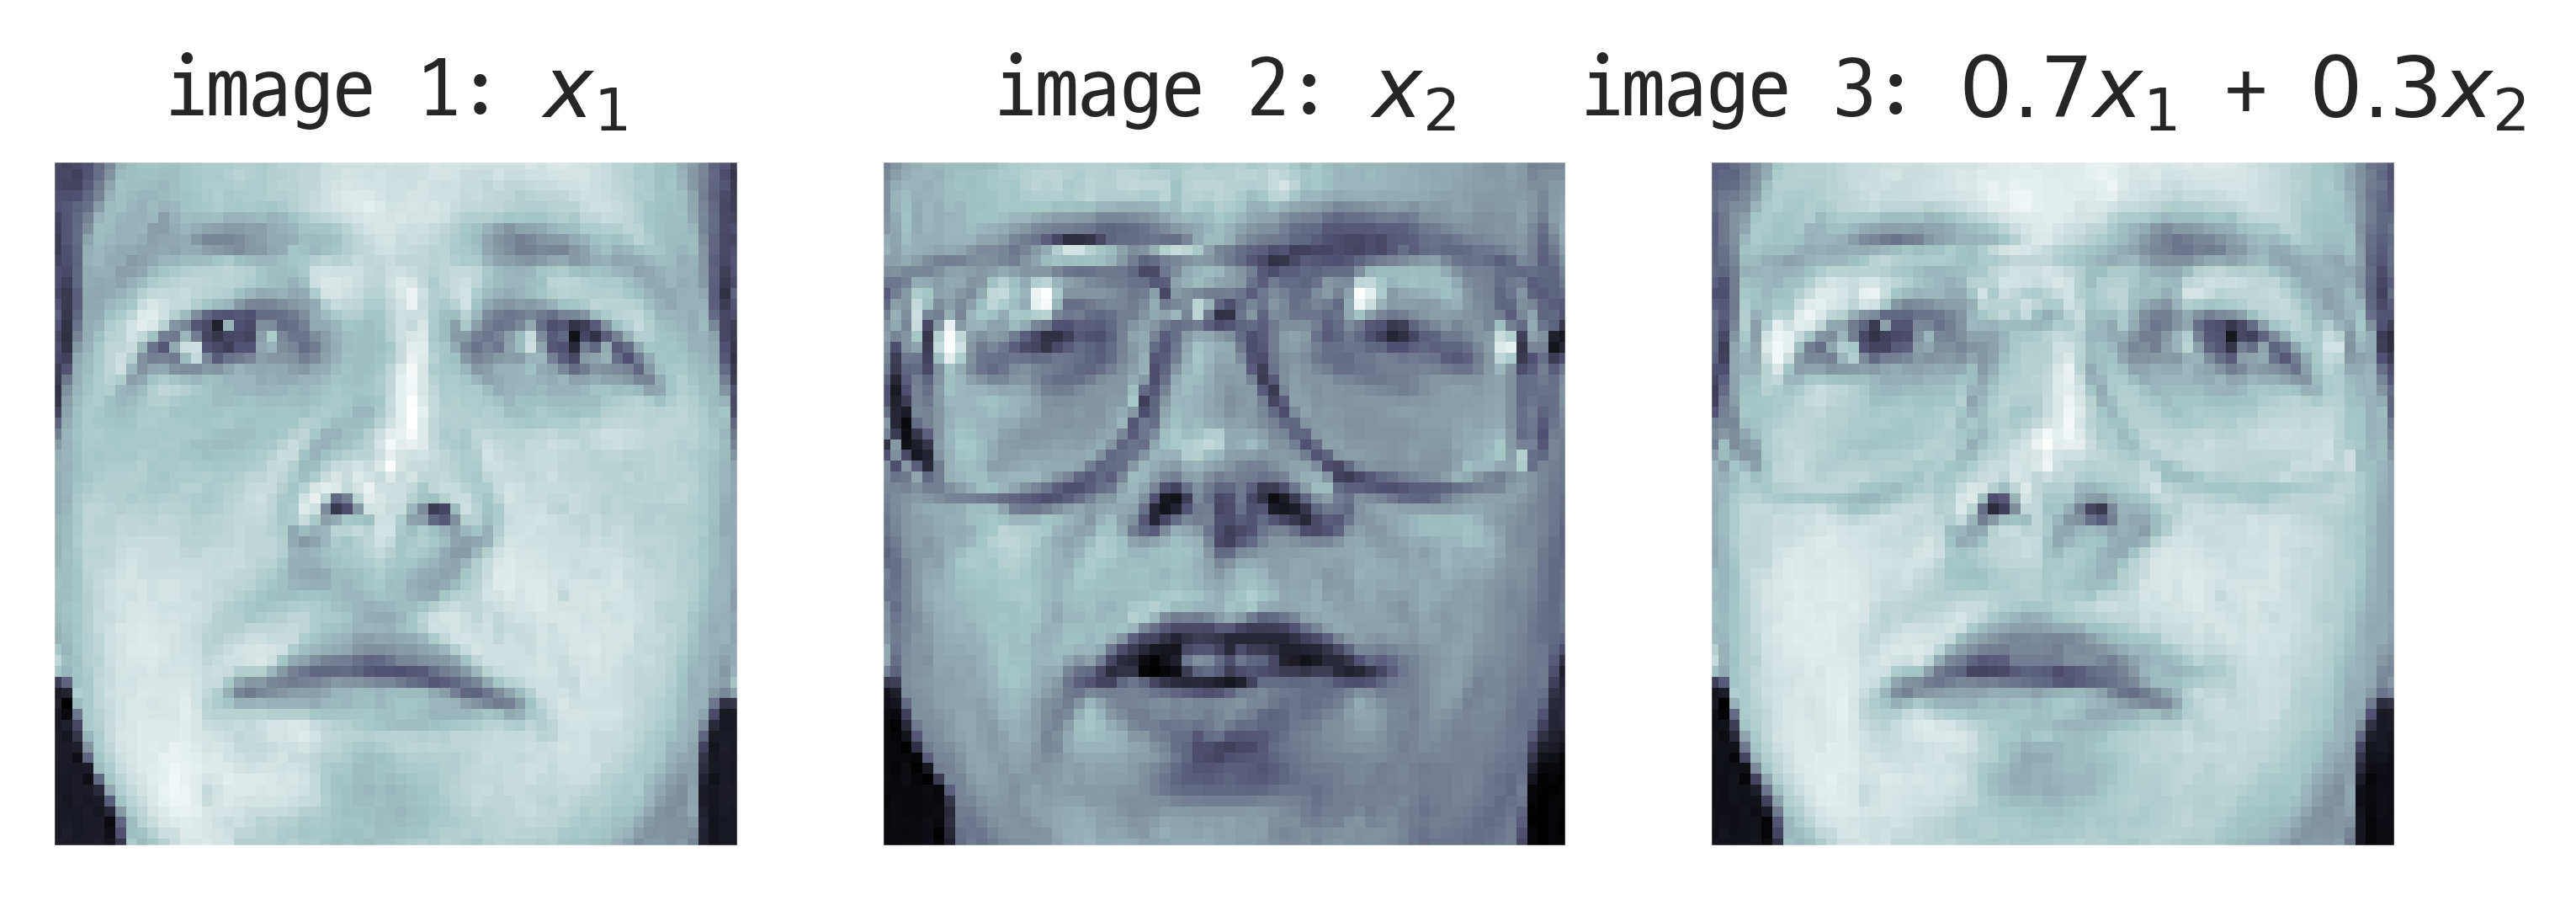

In [57]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1,3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False); ax[0].set_xticks([]); ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False); ax[1].set_xticks([]); ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False); ax[2].set_xticks([]); ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1$ + $0.3x_2$")

plt.show()

#### 이차형식

#### Ex. 2.2.11

In [59]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [60]:
A = np.arange(1, 10).reshape(3, 3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [61]:
x.T @ A @ x

228